# Hey there!
Previously we talked about the SLR with the old method, well which was fast but was limited to a single input X.

**Now** we will try implementing the Gredient Descent which is the searching method to find the coefs / model parameters faster. 

And one of the optimization techniques...
1. Combination optimization — **Greedy Search** 
2. Convex optimization — **Gredient Descent**
3. Constrained Optimization — **Linear Programming**

# 

There is the theory and types of Gredient Descent (I will call it GD). But here as ususal we won't discuss here. 

Let's jump right into the implementation of **SLR**

# 

# Our implementation 

> The thing is: Model and Algoritham is **EVEN *simpler*** than the 11th method. 

    Here we only have to "try" different values and till we reach the minimum error rate. 

# Some Formulas to consider 

—

##### Model

# $$ \hat y = \beta_0 + \beta_1 x_i $$

##### Formulae to update <u>intercept</u>

# $$ \beta_0 = \beta_0 - LearningRate \times error $$

##### Formulae to update <u>coef</u>

# $$ \beta_1 = \beta_1 - LearningRate \times error \times x_i$$

    You may be wondering... why? (about xi)                             ↑
    —                                                                   |
    The answer is that, if we see the function of the LR, the coef is   |
    only parameter which is related to xi. So we need to give the       |
    effect.                                                             |
                                                                        |
    Otherwise the formula for B0 and B1 are the same.                   |
    —                                                                   |
    An also. See that as it is `Stochastic GD` there will the values    |
    be updated on EACH iteration. So xi will be each value.             |

##### Formulae to calculate <u>error</u>

# $$ error = \hat y - y $$

# 

# 

Now, I will make a simple algorithm to get you going.

1. Initialize B0, B1 to 0.0
2. Run the MODEL with B0 and B1 values
3. Calculate the error
4. Update value B0
5. Update value B1
6. Update value Bi (if not SLR model)
7. Repeat 2-6 till the required number of iteration is reached.

# 

In [1]:
import pandas, numpy, matplotlib.pyplot as plt

###### This ↑ is not a good style to import. But I am trying.

# 

In [2]:
# Taking the same data
x = numpy.array([1, 2, 4, 3, 5])
y = numpy.array([1, 3, 3, 2, 5])

In [3]:
# Initializing 0.0
B0 = B1 = 0.0

In [4]:
# Making a linear model
model = lambda B0, B1, xi: B0 + B1 * xi

In [5]:
# It is a STOCHASTIC GD, so for each xi will do the update

learning_rate = 0.01
B0s = []; B1s = []; errors = [];

for xi, yi in zip(x, y):
    pred = model(B0, B1, xi)
    error = pred - yi
    
    B0 = B0 - learning_rate * error
    B1 = B1 - learning_rate * error * xi
    
    B0s.append(B0); B1s.append(B1); errors.append(error)

In [6]:
pandas.DataFrame({"B0": B0s, "B1": B1s, "errors": errors})

,B0,B1,errors
0,0.010000,0.010000,-1.000000
1,0.039700,0.069400,-2.970000
2,0.066527,0.176708,-2.682700
3,0.080560,0.218808,-1.403349
4,0.118814,0.410078,-3.825397


Now you see... at the end of first epoch, we have error quite high. I agreed.

We just need some more iterations. Let's go for 4 epochs. (As in the book)

In [7]:
B0 = B1 = 0.0
learning_rate = 0.01
model = lambda B0, B1, xi: B0 + B1 * xi
B0s = []; B1s = []; errors = [];

for i in range(4):
    for xi, yi in zip(x, y):
        pred = model(B0, B1, xi)
        error = pred - yi

        B0 = B0 - learning_rate * error
        B1 = B1 - learning_rate * error * xi

        B0s.append(B0); B1s.append(B1); errors.append(error)
        
results = pandas.DataFrame({"B0": B0s, "B1": B1s, "errors": errors})
results

,B0,B1,errors
0,0.010000,0.010000,-1.000000
1,0.039700,0.069400,-2.970000
2,0.066527,0.176708,-2.682700
3,0.080560,0.218808,-1.403349
4,0.118814,0.410078,-3.825397
5,0.123526,0.414789,-0.471107
6,0.143994,0.455727,-2.046896
7,0.154325,0.497051,-1.033096
8,0.157871,0.507687,-0.354521
9,0.180908,0.622872,-2.303695


<AxesSubplot:>

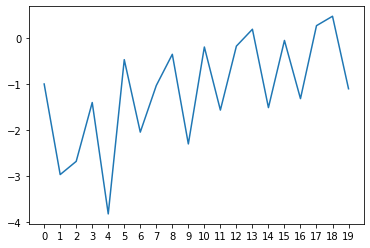

In [8]:
results.errors.plot(xticks=range(0, 20))

It is quite seeable, that in the 18th iteration, we reached at the close to 0 error. 

**And also the B0 = `0.22` and B1 = `0.749`** which are close to the ones which we got in 11th formula. (0.33 and 0.8)

### Running for 50 epochs 

<AxesSubplot:>

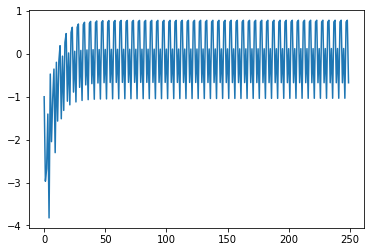

In [9]:
epochs = 50
B0 = B1 = 0.0
learning_rate = 0.01
model = lambda B0, B1, xi: B0 + B1 * xi
B0s = []; B1s = []; errors = [];

for i in range(epochs):
    for xi, yi in zip(x, y):
        pred = model(B0, B1, xi)
        error = pred - yi

        B0 = B0 - learning_rate * error
        B1 = B1 - learning_rate * error * xi

        B0s.append(B0); B1s.append(B1); errors.append(error)
        
results = pandas.DataFrame({"B0": B0s, "B1": B1s, "errors": errors})
results.errors.plot()

So Frekin' weird!

It repeats after certain number... 

I think it is like a hill... goes up and lowest and then up... don't know why. In such cases we should have the Batch GD. 

In [10]:
# Plugging the number 17th row B0 and B1 which gave the lowest error.

In [11]:
results.iloc[17]

B0        0.224587
B1        0.749428
errors    0.267831
Name: 17, dtype: float64

In [12]:
y_hats = []
for xi in x: y_hats.append(model(results.B0[17], results.B1[17], xi))

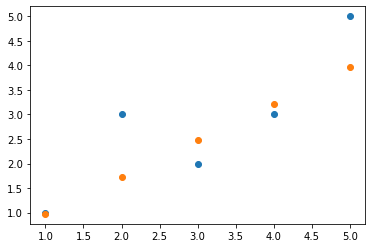

In [13]:
plt.scatter(x, y)
plt.scatter(x, y_hats)

# 

# Great stuff. 

In [16]:
# %%writefile SLR_GD.py
import numpy, pandas

class SLR_GD:
    """
    This SLR class uses Stochastic GD to
    determine the values of B0 and B1.
    
    I know GD should not be used here, but 
    just to learn - how it works, I did.
    
    This is just for single X and Y.
    
    Example
    -------
    >>> model = SLR_GD(x, y)
    >>> model.calculate(epochs=20, learning_rate=0.001)
    >>> model.coef
    >>> model.intecept
    >>> model.predict(x)
    
    """
    def __init__(self, x, y):
        self.x = numpy.array(x)
        self.y = numpy.array(y)
        self.model = lambda B0, B1, xi: B0 + B1 * xi
        
    def calculate(self, epochs: int, learning_rate: float):
        epochs = epochs
        B0 = B1 = 0.0
        learning_rate = learning_rate
        
        self._B0s = []; self._B1s = []; self.errors = []
        for i in range(epochs):
            for xi, yi in zip(x, y):
                pred = self.model(B0, B1, xi)
                error = pred - yi
                B0 = B0 - learning_rate * error
                B1 = B1 - learning_rate * error * xi
                
                self._B0s.append(B0)
                self._B1s.append(B1)
                self.errors.append(error)
        
        self.results = pandas.DataFrame({"B0": self._B0s,
                                    "B1": self._B1s,
                                    "errors": self.errors})
        
        min_id = self.results.errors.apply(abs).idxmin()
        self.intercept = self.results.iloc[min_id].B0
        self.coef = self.results.iloc[min_id].B1
                
    def predict(self, x):
        try:
            y_hat = []
            for xi in x:
                y_hat.append(self.model(self.intercept, self.coef, xi))
            return y_hat
        except ValueError:
            raise Exception("Please run `calculate` method first - then predict")

In [17]:
model = SLR_GD(x, y)

In [18]:
model.calculate(20, 0.01)

In [19]:
model.coef

0.7902252491671318

In [20]:
model.intercept

0.23068413003585025

In [21]:
model.predict(x)

[1.020909379202982,
 1.8111346283701137,
 3.3915851267043773,
 2.6013598775372455,
 4.1818103758715095]

# 

# That's it!
Next up, we will check the results of 11th method and SGD.